In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
import scipy
from collections import Counter
import copy
%matplotlib inline

In [4]:
base_time = 1474275600
class BInfo:
    def __init__(self,params):
        self.id = params[4]
        self.num_operators = params[0]
        self.arrival_time = np.array(params[1]) - base_time
        self.start_time = np.array(params[2]) - base_time
        self.end_time = np.array(params[3]) - base_time
    def __str__(self):
        line = 'bank : ' + str(self.id) + '\n'
        line += str(self.num_operators) + '\n'
        line += str(self.arrival_time[0]) + ' '
        line += str(self.start_time[0]) + ' '
        line += str(self.end_time[0])
        return line

In [5]:
def read_from_files(files):
    data = []
    k = 0
    for fpath in files:
        params = []
        with open(fpath) as f_in:
            i = -1
            for line in f_in:
#                 print(line)
                i += 1
                if i == 1:
                    continue
                s = line.split()
                
                if i == 0:
                    params.append(int(s[-1]))
                    for j in range(3):
                        params.append([])
                else :
                    for j in range(3):
                        params[j + 1].append(int(s[j]))
        params.append(k)
        data.append(BInfo(params))            
        k += 1
    return data

In [6]:
files = ['data/office_' + str(i) for i in range(5)]
data = read_from_files(files)

## 1

Первая серия моментов времени образует пуассоновский процесс $N_t = sup\{n: S_n \leq t\}$, так как по условию промежутки времени $\xi_i$ между приходом следующим $i$-м клиентном распределены экспоненциально ($\xi_i \sim exp(\lambda)$) и независимы в совокупности.

In [15]:
def build_first_plot(info):
    n = len(info.arrival_time)
    plt.figure(figsize=(15,7))
    plt.title('bank ' + str(info.id))
    plt.xlabel('time , sec')
    plt.ylabel('ordinal number')
    for i in range(n):
        x1 = [info.arrival_time[i] , info.start_time[i]]
        x2 = [info.start_time[i] , info.end_time[i]]
        plt.plot(x1,[i,i], color = 'r')
        plt.plot(x2,[i,i], color = 'g')
    plt.show()

def build_poiss_proc_plot(info):
    n = len(info.arrival_time)
    plt.figure(figsize=(15,7))
    plt.grid(True)
    plt.title('bank ' + str(info.id))
    plt.xlabel('t , sec')
    plt.ylabel('N_t')
    X = np.zeros(2*(n+1)) # build T
    Y = np.array([i for i in range(0,2*(n+1))]) // 2 #build N_t
    for j in range(2,2*(n+1)):
        X[j] = info.arrival_time[Y[j] - 1]
    plt.plot(X,Y)
    plt.xlim([0,X[-1] + 10])
    plt.ylim([0,Y[-1]+5])
    plt.show()

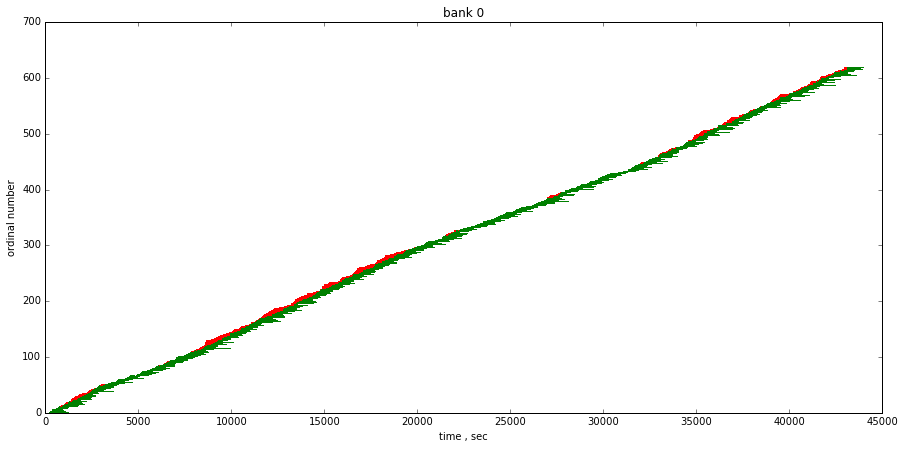

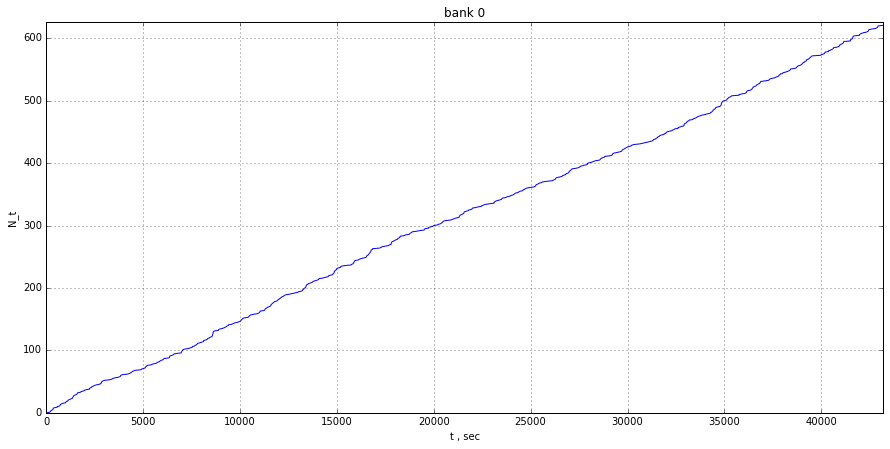

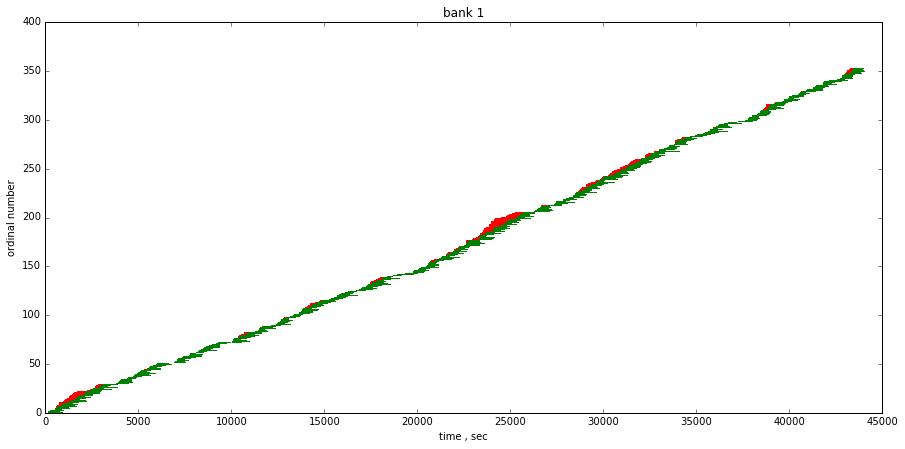

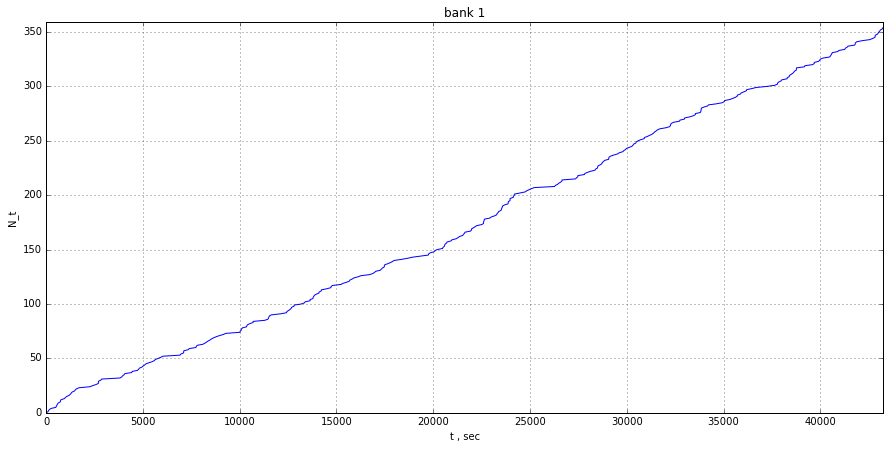

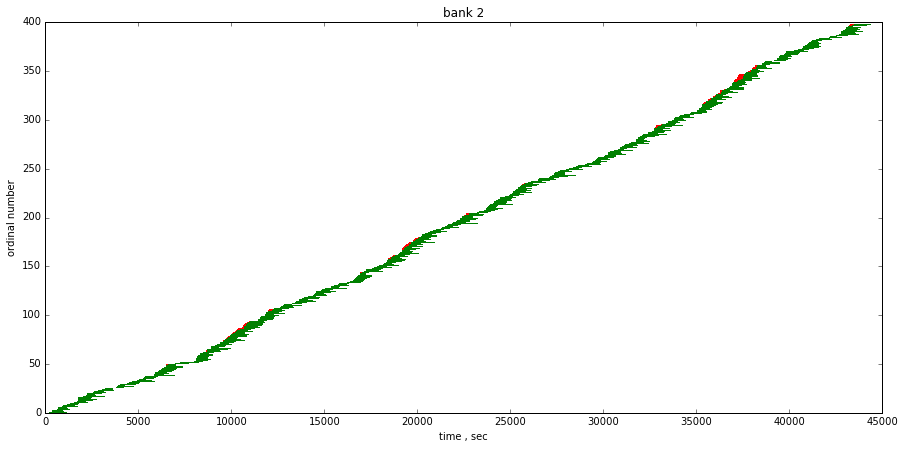

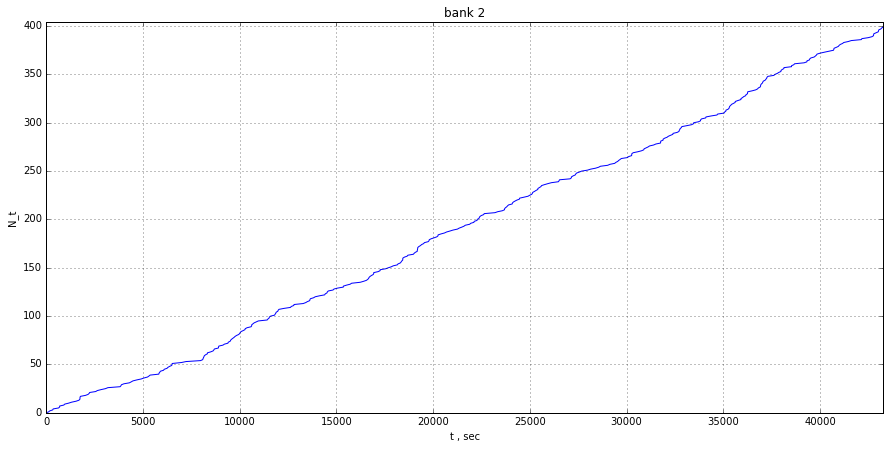

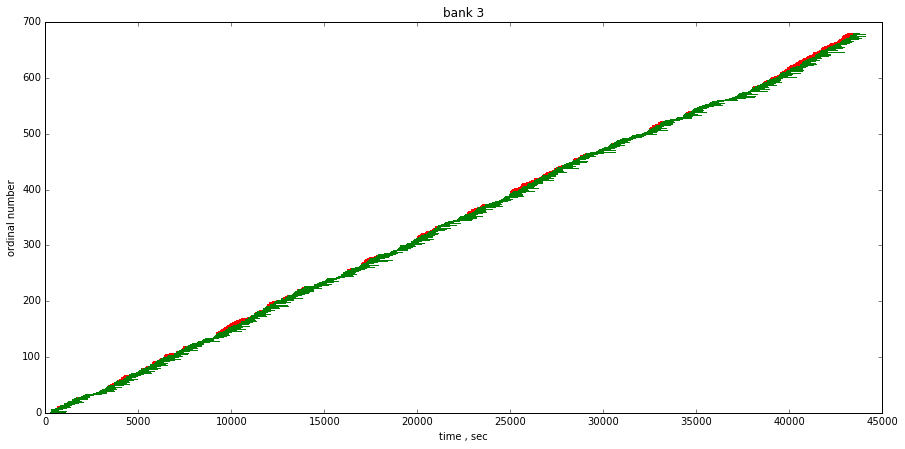

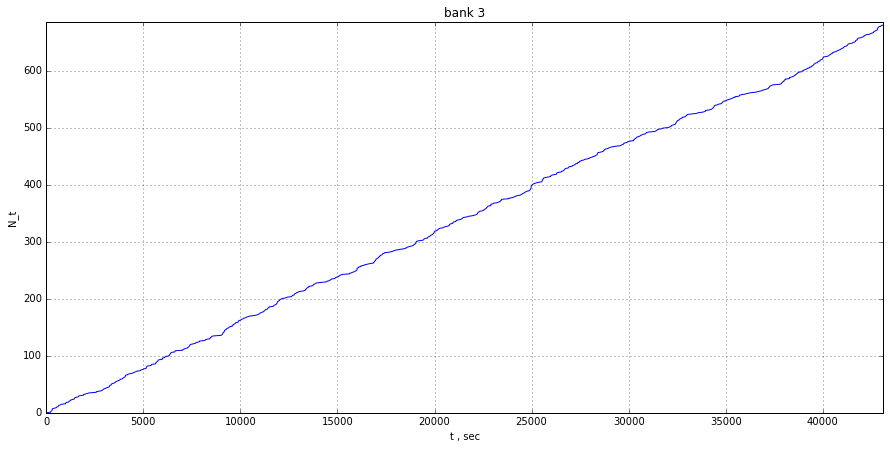

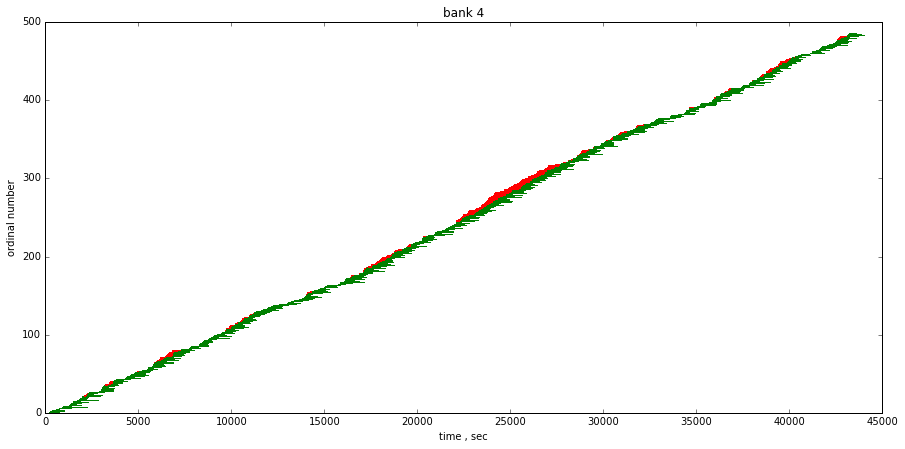

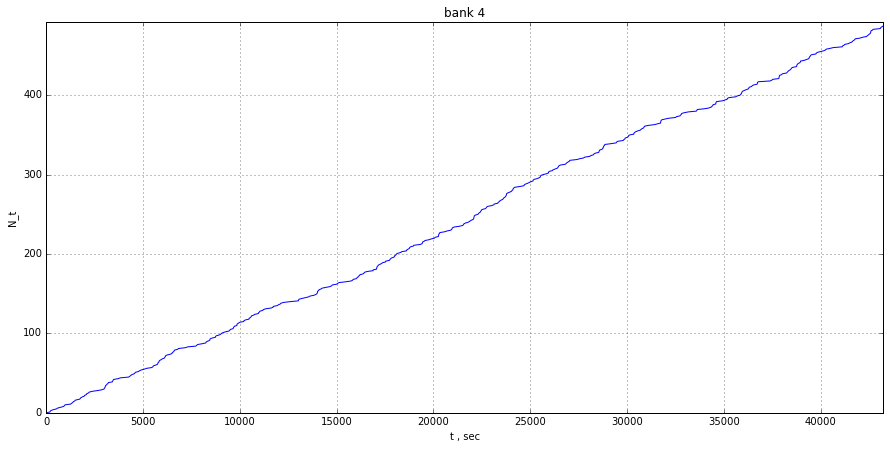

In [16]:
for i in range(5) : 
    build_first_plot(data[i])
    build_poiss_proc_plot(data[i])

Для экспоненциального распределения методом максимального правдоподобия получаем оценку $\hat{\lambda} = \frac{1}{\overline{X}}$, где $X_i = t_i - t_{i-1}$ , $t_i$ - время прихода $i$ - го клиента ($t_0 :=0$)

In [131]:
def get_estimation_exp(info):
    X = np.zeros(len(info.arrival_time))
    for i in range(1,len(info.arrival_time)):
        X[i] = info.arrival_time[i] - info.arrival_time[i-1]
    X[0] = info.arrival_time[0]
    return 1 / np.mean(X)

def get_avg_service_duration(info):
    service_duration = info.end_time - info.start_time
    return np.mean(service_duration)

In [132]:
lmb = []
avg_service_duration = []
for info in data:
    lmb.append(get_estimation_exp(info))
    avg_service_duration.append(get_avg_service_time(info))
    print(str(info.id) + ': lambda = ' + str(lmb[-1]) +\
          ', avg service duration = ' + str(avg_service_duration[-1]))

0: lambda = 0.014379660075, avg service duration = 625.355877617
1: lambda = 0.00818610674313, avg service duration = 592.474576271
2: lambda = 0.00922436712519, avg service duration = 642.192982456
3: lambda = 0.0158011972713, avg service duration = 599.190895742
4: lambda = 0.0112687137006, avg service duration = 594.63449692


In [169]:
def build_density_hist(info) :
    service_time = info.end_time - info.start_time
    plt.figure(figsize=(12,5))
    plt.grid(True)
    plt.title('density hist; bank ' + str(info.id) )
    plt.xlabel('t')
    plt.ylabel('p(t)')
    
    plt.hist(service_time, 60, facecolor='b', alpha=0.6)
#     plt.hist(service_time, bins=np.arange(1,1600), facecolor='b', alpha=0.6)
    plt.show()


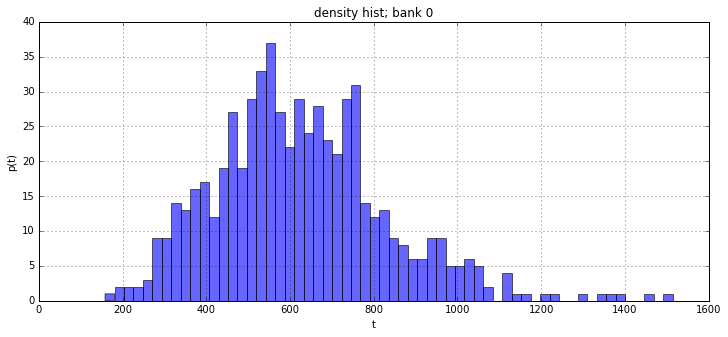

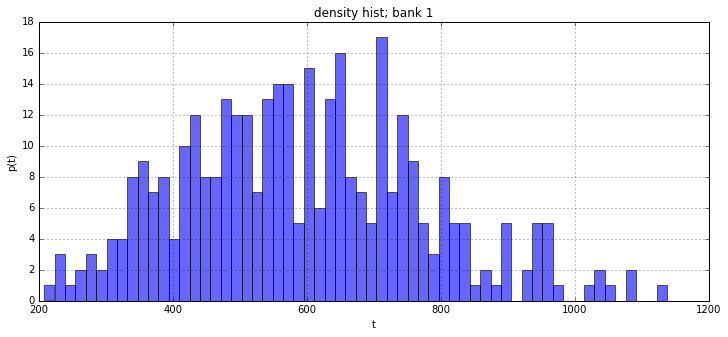

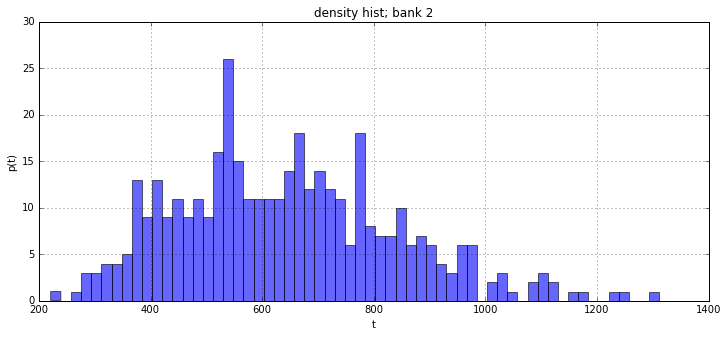

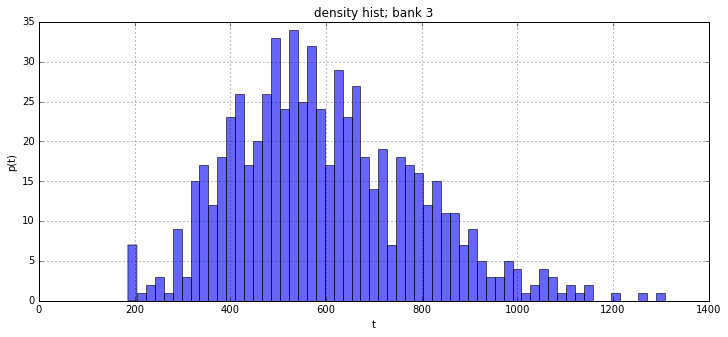

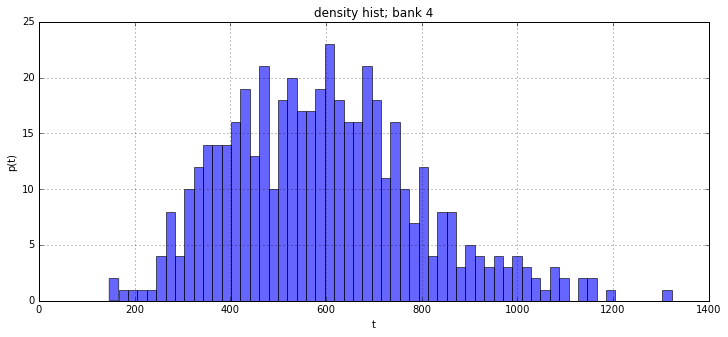

In [170]:
for info in data:
    build_density_hist(info)

In [56]:

def get_poiss_confidence_interval(lmb , alpha):
    l = sps.poisson.ppf(alpha,lmb)
    r = sps.poisson.ppf(1-alpha,lmb)
    return l,r

get_poiss_confidence_interval(lmb=10,alpha=0.05)
# sps.poisson.cdf(x=5,mu=10)

(5.0, 15.0)